<a href="https://colab.research.google.com/github/GoTudering/Final_Project_MTH3033/blob/main/MTH3033_Final_Project_Group_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import numpy as np
from glob import glob
try:
    import cv2
    from google. colab.patches import cv2_imshow
except:
    pass
from time import time

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# Lenet

Hpyerparameters
- learning_rate = 0.001
- training_epochs = 30
- batch_size = 100
- \[Epoch:   30\] cost = 0.323462397
- Accuracy: 83.7%

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 30
batch_size = 100

In [ ]:
Fashion_mnist_train = datasets.FashionMNIST(root='FashionMNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

Fashion_mnist_test = datasets.FashionMNIST(root='FashionMNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=Fashion_mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
# Lenet Model
class Lenet(torch.nn.Module):

    def __init__(self):
        super(Lenet, self).__init__()
        self.keep_prob = 0.5 # for dropout
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 6)
        #    Pool     -> (?, 14, 14, 6)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            torch.nn.Sigmoid(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 6)
        #    Conv      ->(?, 10, 10, 16)
        #    Pool      ->(?, 5, 5, 16)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16, kernel_size=5, stride=1),
            torch.nn.Sigmoid(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 5, 5, 16)
        #    Conv      ->(?, 1, 1, 120)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 120, kernel_size=5, stride=1),
            torch.nn.Sigmoid(),
            torch.nn.AvgPool2d(1,stride = 1))

        # L4 FC 1x1x120 inputs -> 84 outputs
        self.fc1 = torch.nn.Linear(1 * 1 * 120, 84, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.Sigmoid(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 84 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(84, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [ ]:
# instantiate Lenet model
model = Lenet().to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    start_time = time()
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    t_int = time() - start_time

    print('[Epoch: {:>4}] cost = {:>.9} time = {:>.3}'.format(epoch + 1, avg_cost, t_int))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 2.30245304 time = 3.35
[Epoch:    2] cost = 0.972696006 time = 3.33
[Epoch:    3] cost = 0.693885922 time = 3.34
[Epoch:    4] cost = 0.623212457 time = 3.35
[Epoch:    5] cost = 0.573274791 time = 3.34
[Epoch:    6] cost = 0.538884699 time = 3.35
[Epoch:    7] cost = 0.51257056 time = 3.34
[Epoch:    8] cost = 0.49055469 time = 3.34
[Epoch:    9] cost = 0.471953303 time = 3.34
[Epoch:   10] cost = 0.455652952 time = 3.35
[Epoch:   11] cost = 0.442127824 time = 3.35
[Epoch:   12] cost = 0.429072708 time = 3.36
[Epoch:   13] cost = 0.417727262 time = 3.36
[Epoch:   14] cost = 0.409175932 time = 3.36
[Epoch:   15] cost = 0.400433272 time = 3.36
[Epoch:   16] cost = 0.39276728 time = 3.36
[Epoch:   17] cost = 0.383944124 time = 3.36
[Epoch:   18] cost = 0.378917217 time = 3.36
[Epoch:   19] cost = 0.371140301 time = 3.36
[Epoch:   20] cost = 0.363427758 time = 3.33
[Epoch:   21] cost = 0.359794617 time = 3.33
[Epoch:   22] cost = 0

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

61706


In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = Fashion_mnist_test.test_data.view(len(Fashion_mnist_test), 1, 28, 28).float().to(device)
    Y_test = Fashion_mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8366000056266785


/apps/vv137/conda/envs/torch/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/apps/vv137/conda/envs/torch/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## New hyperparameters
- learning_rate = 0.0001
- training_epochs = 30
- batch_size = 100
- \[Epoch:   30\] cost = 0.623933136
- Accuracy: 55.26%

In [ ]:
# parameters
learning_rate = 0.0001
training_epochs = 30
batch_size = 100

In [ ]:
# instantiate Lenet model
model = Lenet().to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    start_time = time()
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    t_int = time() - start_time

    print('[Epoch: {:>4}] cost = {:>.9} time = {:>.3}'.format(epoch + 1, avg_cost, t_int))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 2.39497805 time = 3.35
[Epoch:    2] cost = 2.31842113 time = 3.34
[Epoch:    3] cost = 2.30986357 time = 3.34
[Epoch:    4] cost = 2.30571485 time = 3.33
[Epoch:    5] cost = 2.30316877 time = 3.33
[Epoch:    6] cost = 2.06571651 time = 3.31
[Epoch:    7] cost = 1.47964871 time = 3.31
[Epoch:    8] cost = 1.2263447 time = 3.41
[Epoch:    9] cost = 1.0897001 time = 3.36
[Epoch:   10] cost = 0.998242676 time = 3.38
[Epoch:   11] cost = 0.933161914 time = 3.36
[Epoch:   12] cost = 0.887539804 time = 3.35
[Epoch:   13] cost = 0.851607561 time = 3.35
[Epoch:   14] cost = 0.822056592 time = 3.35
[Epoch:   15] cost = 0.796923995 time = 3.35
[Epoch:   16] cost = 0.775072277 time = 3.35
[Epoch:   17] cost = 0.754238248 time = 3.35
[Epoch:   18] cost = 0.735512674 time = 3.32
[Epoch:   19] cost = 0.723216832 time = 3.32
[Epoch:   20] cost = 0.711005986 time = 3.33
[Epoch:   21] cost = 0.698223233 time = 3.31
[Epoch:   22] cost = 0.686553

In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = Fashion_mnist_test.test_data.view(len(Fashion_mnist_test), 1, 28, 28).float().to(device)
    Y_test = Fashion_mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.5525999665260315


# Another new hyperparameters
- learning_rate = 0.01
- training_epochs = 30
- batch_size = 100
- \[Epoch:   30\] cost = 0.231829226
- Accuracy: 85.71%

In [ ]:
# parameters
learning_rate = 0.01
training_epochs = 30
batch_size = 100

In [ ]:
# instantiate Lenet model
model = Lenet().to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 1.131513
[Epoch:    2] cost = 0.53677702
[Epoch:    3] cost = 0.457695514
[Epoch:    4] cost = 0.414591968
[Epoch:    5] cost = 0.389568269
[Epoch:    6] cost = 0.370916426
[Epoch:    7] cost = 0.349738061
[Epoch:    8] cost = 0.33857277
[Epoch:    9] cost = 0.326101571
[Epoch:   10] cost = 0.316689432
[Epoch:   11] cost = 0.309548616
[Epoch:   12] cost = 0.305716395
[Epoch:   13] cost = 0.297814995
[Epoch:   14] cost = 0.290650666
[Epoch:   15] cost = 0.286495715
[Epoch:   16] cost = 0.276740432
[Epoch:   17] cost = 0.273112804
[Epoch:   18] cost = 0.271924317
[Epoch:   19] cost = 0.263724089
[Epoch:   20] cost = 0.261057198
[Epoch:   21] cost = 0.258934826
[Epoch:   22] cost = 0.257813811
[Epoch:   23] cost = 0.251692116
[Epoch:   24] cost = 0.250494868
[Epoch:   25] cost = 0.2454779
[Epoch:   26] cost = 0.242721602
[Epoch:   27] cost = 0.238347575
[Epoch:   28] cost = 0.237292781
[Epoch:   29] cost = 0.235936657
[Epoch:   30]

In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = Fashion_mnist_test.test_data.view(len(Fashion_mnist_test), 1, 28, 28).float().to(device)
    Y_test = Fashion_mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8570999503135681


# Alexnet

- Acc: 91.33%

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

CHECKPOINTS_DIR = './Alexmodels'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

다음 링크를 다운 받아 `Alexmodels` 디렉터리에 넣어주시기 바랍니다.

https://drive.google.com/file/d/1pYgMjH1yVlPwbidALENfeAo2aqBNxeHS/view?usp=share_link

한 Epoch 당 Colab으로 2시간이 걸려 지인의 RTX 4090 GPU를 빌려 학습을 수행하였습니다.

해당 GPU로 돌리니 한 Epoch 당 20초밖에 걸리지 않아 충분한 횟수의 학습을 진행하였습니다.

이를 통해 얻은 최선의 가중치 결과 파일을 첨부하였습니다.

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
to_rgb = transforms.Lambda(lambda image: image.convert('RGB'))
resize = transforms.Resize((224, 224))
oh_my_eyes_transform = transforms.Compose([resize, to_rgb, transforms.ToTensor(), normalize])

train_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                  train=True,
                                  transform=oh_my_eyes_transform,
                                  download=True)
test_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                 train=False,
                                 transform=oh_my_eyes_transform,
                                 download=True)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.num_classes: int = 10
        dropout: float = 0.5

        # Input: (N, 3, 224, 224)
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),  # (N, 54, 54, 96)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 26, 26, 96)
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  # (N, 26, 26, 256)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 12, 12, 256)
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  # (N, 12, 12, 384)
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  # (N, 12, 12, 384)
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  # (N, 12, 12, 384)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 5, 5, 256)
        ) # Output: (N, 256)

        # Input: (N, 256)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 5 * 5, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, self.num_classes),
        ) # Output: (N, 1000)

    def _initialize(self):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weigh, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        for i in (3, 8, 10):
            nn.init.constant_(self.features[i].bias, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(-1, 5 * 5 * 256)
        x = self.classifier(x)
        return x

In [ ]:
seed = torch.initial_seed()
print(f"Seed: {seed}")

model = AlexNet().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_loader = data.DataLoader(train_set, shuffle=True,
                               pin_memory=True, num_workers=2,
                               drop_last=True, batch_size=BATCH_SIZE)

Seed: 777


In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

46787978


In [ ]:
print("Start training...")
total_steps = 1
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(train_loader, ascii=True, ncols=80)
    loss_records = []
    for imgs, classes in pbar:
        imgs, classes = imgs.to(device), classes.to(device)

        # Calculate the loss
        output = model(imgs)
        loss = F.cross_entropy(output, classes)

        # Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_records.append(loss.item())

        # Log
#         if total_steps % 50 == 0:
#             with torch.no_grad():
#                 model.eval()
#                 _, preds = torch.max(output, 1)
#                 accuracy = torch.sum(preds == classes)

#                 print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss.item():.4f} \tAcc: {accuracy.item()}/{BATCH_SIZE}")
#                 model.train()
        total_steps += 1
    loss_mean = np.mean(loss_records)
    print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss_mean:.4f}")
    lr_scheduler.step()

    checkpoint_path = os.path.join(CHECKPOINTS_DIR, f"alexnet_states_e{epoch + 1:04d}.pkl")
    state = {
        'epoch': epoch,
        'total_steps': total_steps,
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'seed': seed,
    }
    torch.save(state, checkpoint_path)

Start training...


100%|#########################################| 468/468 [00:19<00:00, 24.08it/s]


Epoch: 1 	Step: 469 	Loss: 0.7336


100%|#########################################| 468/468 [00:19<00:00, 24.11it/s]


Epoch: 2 	Step: 937 	Loss: 0.4224


100%|#########################################| 468/468 [00:19<00:00, 23.98it/s]


Epoch: 3 	Step: 1405 	Loss: 0.3683


100%|#########################################| 468/468 [00:19<00:00, 24.07it/s]


Epoch: 4 	Step: 1873 	Loss: 0.3453


100%|#########################################| 468/468 [00:19<00:00, 23.97it/s]


Epoch: 5 	Step: 2341 	Loss: 0.3245


100%|#########################################| 468/468 [00:19<00:00, 23.87it/s]


Epoch: 6 	Step: 2809 	Loss: 0.3069


100%|#########################################| 468/468 [00:19<00:00, 23.90it/s]


Epoch: 7 	Step: 3277 	Loss: 0.2916


100%|#########################################| 468/468 [00:19<00:00, 23.64it/s]


Epoch: 8 	Step: 3745 	Loss: 0.2810


100%|#########################################| 468/468 [00:19<00:00, 23.82it/s]


Epoch: 9 	Step: 4213 	Loss: 0.2739


100%|#########################################| 468/468 [00:19<00:00, 24.31it/s]


Epoch: 10 	Step: 4681 	Loss: 0.2564


100%|#########################################| 468/468 [00:19<00:00, 23.54it/s]


Epoch: 11 	Step: 5149 	Loss: 0.2474


100%|#########################################| 468/468 [00:19<00:00, 23.91it/s]


Epoch: 12 	Step: 5617 	Loss: 0.2470


100%|#########################################| 468/468 [00:19<00:00, 24.11it/s]


Epoch: 13 	Step: 6085 	Loss: 0.2382


100%|#########################################| 468/468 [00:19<00:00, 24.22it/s]


Epoch: 14 	Step: 6553 	Loss: 0.2316


100%|#########################################| 468/468 [00:19<00:00, 23.77it/s]


Epoch: 15 	Step: 7021 	Loss: 0.2233


100%|#########################################| 468/468 [00:19<00:00, 23.89it/s]


Epoch: 16 	Step: 7489 	Loss: 0.2231


100%|#########################################| 468/468 [00:19<00:00, 24.02it/s]


Epoch: 17 	Step: 7957 	Loss: 0.2103


100%|#########################################| 468/468 [00:19<00:00, 23.56it/s]


Epoch: 18 	Step: 8425 	Loss: 0.2078


100%|#########################################| 468/468 [00:19<00:00, 23.91it/s]


Epoch: 19 	Step: 8893 	Loss: 0.2041


100%|#########################################| 468/468 [00:19<00:00, 23.91it/s]


Epoch: 20 	Step: 9361 	Loss: 0.2039


In [ ]:
test_loader = data.DataLoader(test_set, shuffle=True,
                              pin_memory=True, num_workers=2,
                              batch_size=BATCH_SIZE)

In [ ]:
model_paths = glob(os.path.join(CHECKPOINTS_DIR, 'alexnet_states_e????.pkl'))
model_paths.sort()

accuracy_records = []

for model_path in model_paths:
    print(model_path)
    chk = torch.load(model_path)
    epoch = chk['epoch']
    
    model = AlexNet()
    model.load_state_dict(chk['model'])  # Load parameters from the checkpoint
    model = model.to(device)
  
    correct_coutner = 0
    pbar = tqdm(test_loader, ascii=True, ncols=80, total=len(test_set))
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        
        with torch.no_grad():
            output = model(imgs)
            model.eval()
            _, preds = torch.max(output, 1)
            accuracy = torch.sum(preds == labels)
            correct_coutner += accuracy.item()
        pbar.update(BATCH_SIZE)

    print(f"Epoch: {epoch + 1} \tAcc: {correct_coutner}/{len(test_set)}")
    accuracy_records.append(dict(epoch=(epoch + 1), correct = correct_coutner, path=model_path))

accuracy_records.sort(reverse=True, key=lambda x: x['correct'])
print(accuracy_records)    

./Alexmodels/alexnet_states_e0001.pkl


  1%|3                                       | 79/10000 [00:03<07:01, 23.56it/s]


Epoch: 1 	Acc: 8313/10000
./Alexmodels/alexnet_states_e0002.pkl


  1%|3                                       | 79/10000 [00:03<07:09, 23.12it/s]


Epoch: 2 	Acc: 8690/10000
./Alexmodels/alexnet_states_e0003.pkl


  1%|3                                       | 79/10000 [00:03<07:04, 23.36it/s]


Epoch: 3 	Acc: 8746/10000
./Alexmodels/alexnet_states_e0004.pkl


  1%|3                                       | 79/10000 [00:03<07:10, 23.06it/s]


Epoch: 4 	Acc: 8859/10000
./Alexmodels/alexnet_states_e0005.pkl


  1%|3                                       | 79/10000 [00:03<07:09, 23.11it/s]


Epoch: 5 	Acc: 8864/10000
./Alexmodels/alexnet_states_e0006.pkl


  1%|3                                       | 79/10000 [00:03<07:07, 23.22it/s]


Epoch: 6 	Acc: 8873/10000
./Alexmodels/alexnet_states_e0007.pkl


  1%|3                                       | 79/10000 [00:03<07:09, 23.07it/s]


Epoch: 7 	Acc: 8923/10000
./Alexmodels/alexnet_states_e0008.pkl


  1%|3                                       | 79/10000 [00:03<07:10, 23.05it/s]


Epoch: 8 	Acc: 9008/10000
./Alexmodels/alexnet_states_e0009.pkl


  1%|3                                       | 79/10000 [00:03<07:09, 23.10it/s]


Epoch: 9 	Acc: 8913/10000
./Alexmodels/alexnet_states_e0010.pkl


  1%|3                                       | 79/10000 [00:03<07:10, 23.06it/s]


Epoch: 10 	Acc: 9093/10000
./Alexmodels/alexnet_states_e0011.pkl


  1%|3                                       | 79/10000 [00:03<07:10, 23.07it/s]


Epoch: 11 	Acc: 9088/10000
./Alexmodels/alexnet_states_e0012.pkl


  1%|3                                       | 79/10000 [00:03<07:10, 23.04it/s]


Epoch: 12 	Acc: 9046/10000
./Alexmodels/alexnet_states_e0013.pkl


  1%|3                                       | 79/10000 [00:03<07:09, 23.12it/s]


Epoch: 13 	Acc: 9037/10000
./Alexmodels/alexnet_states_e0014.pkl


  1%|3                                       | 79/10000 [00:03<07:19, 22.56it/s]


Epoch: 14 	Acc: 9117/10000
./Alexmodels/alexnet_states_e0015.pkl


  1%|3                                       | 79/10000 [00:03<07:11, 23.01it/s]


Epoch: 15 	Acc: 9019/10000
./Alexmodels/alexnet_states_e0016.pkl


  1%|3                                       | 79/10000 [00:03<07:12, 22.94it/s]


Epoch: 16 	Acc: 9101/10000
./Alexmodels/alexnet_states_e0017.pkl


  1%|3                                       | 79/10000 [00:03<07:14, 22.82it/s]


Epoch: 17 	Acc: 9100/10000
./Alexmodels/alexnet_states_e0018.pkl


  1%|3                                       | 79/10000 [00:03<07:18, 22.63it/s]


Epoch: 18 	Acc: 9126/10000
./Alexmodels/alexnet_states_e0019.pkl


  1%|3                                       | 79/10000 [00:03<07:13, 22.89it/s]


Epoch: 19 	Acc: 9115/10000
./Alexmodels/alexnet_states_e0020.pkl


  1%|3                                       | 79/10000 [00:03<07:10, 23.05it/s]

Epoch: 20 	Acc: 9133/10000
[{'epoch': 20, 'correct': 9133, 'path': './Alexmodels/alexnet_states_e0020.pkl'}, {'epoch': 18, 'correct': 9126, 'path': './Alexmodels/alexnet_states_e0018.pkl'}, {'epoch': 14, 'correct': 9117, 'path': './Alexmodels/alexnet_states_e0014.pkl'}, {'epoch': 19, 'correct': 9115, 'path': './Alexmodels/alexnet_states_e0019.pkl'}, {'epoch': 16, 'correct': 9101, 'path': './Alexmodels/alexnet_states_e0016.pkl'}, {'epoch': 17, 'correct': 9100, 'path': './Alexmodels/alexnet_states_e0017.pkl'}, {'epoch': 10, 'correct': 9093, 'path': './Alexmodels/alexnet_states_e0010.pkl'}, {'epoch': 11, 'correct': 9088, 'path': './Alexmodels/alexnet_states_e0011.pkl'}, {'epoch': 12, 'correct': 9046, 'path': './Alexmodels/alexnet_states_e0012.pkl'}, {'epoch': 13, 'correct': 9037, 'path': './Alexmodels/alexnet_states_e0013.pkl'}, {'epoch': 15, 'correct': 9019, 'path': './Alexmodels/alexnet_states_e0015.pkl'}, {'epoch': 8, 'correct': 9008, 'path': './Alexmodels/alexnet_states_e0008.pkl'}, {

# Simplyified Alexnet

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

In [ ]:
train_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                  train=True,
                                  transform=transforms.ToTensor(),
                                  download=True)
test_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                 train=False,
                                 transform=transforms.ToTensor(),
                                 download=True)

# Simplified Alexnet 1
- Acc: 89.21% (13)

In [ ]:
CHECKPOINTS_DIR = './SAlexmodels.1'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

In [ ]:
class SAlexNet1(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        num_classes: int = 10
        dropout: float = 0.5

        # Input: (N, 1, 28, 28)
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=6, stride=2, padding=0),  # (N, 12, 12, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=5, stride=1, padding=0),  # (N, 8, 8, 32)
            nn.Conv2d(32, 96, kernel_size=5, stride=1, padding=2),  # (N, 8, 8, 96)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=1, padding=0),  # (N, 5, 5, 32)
            nn.Conv2d(96, 128, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 128)
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 128)
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 96, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 96)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 2, 2, 96)
        ) # Output: (N, 2, 2, 96)

        # Input: (N, 2, 2, 96)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(96 * 2 * 2, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(256, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        ) # Output: (N, 100)

    def _initialize(self):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weigh, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        for i in (3, 8, 10):
            nn.init.constant_(self.features[i].bias, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(-1, 2 * 2 * 96)
        x = self.classifier(x)
        return x

In [ ]:
seed = torch.initial_seed()
print(f"Seed: {seed}")

model = SAlexNet1().to(device)

total_params = sum(p.numel() for p in model.parameters())
print(total_params)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_loader = data.DataLoader(train_set, shuffle=True,
                               pin_memory=True, num_workers=2,
                               drop_last=True, batch_size=BATCH_SIZE)

print("Start training...")
total_steps = 1
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(train_loader, ascii=True, ncols=80)
    loss_records = []
    for imgs, classes in pbar:
        imgs, classes = imgs.to(device), classes.to(device)

        # Calculate the loss
        output = model(imgs)
        loss = F.cross_entropy(output, classes)

        # Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_records.append(loss.item())

        # Log
#         if total_steps % 50 == 0:
#             with torch.no_grad():
#                 model.eval()
#                 _, preds = torch.max(output, 1)
#                 accuracy = torch.sum(preds == classes)

#                 print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss.item():.4f} \tAcc: {accuracy.item()}/{BATCH_SIZE}")
#                 model.train()
        total_steps += 1
    loss_mean = np.mean(loss_records)
    print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss_mean:.4f}")
    lr_scheduler.step()

    checkpoint_path = os.path.join(CHECKPOINTS_DIR, f"salexnet_states1_e{epoch + 1:04d}.pkl")
    state = {
        'epoch': epoch,
        'total_steps': total_steps,
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'seed': seed,
    }
    torch.save(state, checkpoint_path)

Seed: 777
613994
Start training...


100%|########################################| 468/468 [00:01<00:00, 290.70it/s]


Epoch: 1 	Step: 469 	Loss: 0.9148


100%|########################################| 468/468 [00:01<00:00, 305.97it/s]


Epoch: 2 	Step: 937 	Loss: 0.5058


100%|########################################| 468/468 [00:01<00:00, 280.77it/s]


Epoch: 3 	Step: 1405 	Loss: 0.4170


100%|########################################| 468/468 [00:01<00:00, 300.73it/s]


Epoch: 4 	Step: 1873 	Loss: 0.3784


100%|########################################| 468/468 [00:01<00:00, 293.57it/s]


Epoch: 5 	Step: 2341 	Loss: 0.3520


100%|########################################| 468/468 [00:01<00:00, 305.49it/s]


Epoch: 6 	Step: 2809 	Loss: 0.3305


100%|########################################| 468/468 [00:01<00:00, 297.64it/s]


Epoch: 7 	Step: 3277 	Loss: 0.3192


100%|########################################| 468/468 [00:01<00:00, 319.38it/s]


Epoch: 8 	Step: 3745 	Loss: 0.3019


100%|########################################| 468/468 [00:01<00:00, 299.17it/s]


Epoch: 9 	Step: 4213 	Loss: 0.2902


100%|########################################| 468/468 [00:01<00:00, 297.64it/s]


Epoch: 10 	Step: 4681 	Loss: 0.2823


100%|########################################| 468/468 [00:01<00:00, 304.38it/s]


Epoch: 11 	Step: 5149 	Loss: 0.2741


100%|########################################| 468/468 [00:01<00:00, 304.14it/s]


Epoch: 12 	Step: 5617 	Loss: 0.2657


100%|########################################| 468/468 [00:01<00:00, 304.50it/s]


Epoch: 13 	Step: 6085 	Loss: 0.2576


100%|########################################| 468/468 [00:01<00:00, 294.75it/s]


Epoch: 14 	Step: 6553 	Loss: 0.2476


100%|########################################| 468/468 [00:01<00:00, 304.71it/s]


Epoch: 15 	Step: 7021 	Loss: 0.2413


100%|########################################| 468/468 [00:01<00:00, 308.38it/s]


Epoch: 16 	Step: 7489 	Loss: 0.2331


100%|########################################| 468/468 [00:01<00:00, 307.26it/s]


Epoch: 17 	Step: 7957 	Loss: 0.2270


100%|########################################| 468/468 [00:01<00:00, 302.98it/s]


Epoch: 18 	Step: 8425 	Loss: 0.2204


100%|########################################| 468/468 [00:01<00:00, 301.57it/s]


Epoch: 19 	Step: 8893 	Loss: 0.2159


100%|########################################| 468/468 [00:01<00:00, 300.27it/s]

Epoch: 20 	Step: 9361 	Loss: 0.2060


In [ ]:
test_loader = data.DataLoader(test_set, shuffle=True,
                              pin_memory=True, num_workers=2,
                              batch_size=BATCH_SIZE)
model_paths = glob(os.path.join(CHECKPOINTS_DIR, 'salexnet_states1_e????.pkl'))
model_paths.sort()

accuracy_records = []

for model_path in model_paths:
    chk = torch.load(model_path)
    epoch = chk['epoch']
    
    model = SAlexNet1()
    model.load_state_dict(chk['model'])  # Load parameters from the checkpoint
    model = model.to(device)
  
    correct_coutner = 0
    pbar = tqdm(test_loader, ascii=True, ncols=80, total=len(test_set))
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        
        with torch.no_grad():
            output = model(imgs)
            model.eval()
            _, preds = torch.max(output, 1)
            accuracy = torch.sum(preds == labels)
            correct_coutner += accuracy.item()
        pbar.update(BATCH_SIZE)

    print(f"Epoch: {epoch + 1} \tAcc: {correct_coutner}/{len(test_set)}")
    accuracy_records.append(dict(epoch=(epoch + 1), correct = correct_coutner, path=model_path))

accuracy_records.sort(reverse=True, key=lambda x: x['correct'])
print(accuracy_records[0])    

  1%|3                                      | 79/10000 [00:00<00:38, 256.63it/s]


Epoch: 1 	Acc: 7927/10000


  1%|3                                      | 79/10000 [00:00<00:39, 248.94it/s]


Epoch: 2 	Acc: 8325/10000


  1%|3                                      | 79/10000 [00:00<00:41, 241.77it/s]


Epoch: 3 	Acc: 8485/10000


  1%|3                                      | 79/10000 [00:00<00:41, 239.71it/s]


Epoch: 4 	Acc: 8652/10000


  1%|3                                      | 79/10000 [00:00<00:40, 244.00it/s]


Epoch: 5 	Acc: 8587/10000


  1%|3                                      | 79/10000 [00:00<00:46, 212.53it/s]


Epoch: 6 	Acc: 8740/10000


  1%|3                                      | 79/10000 [00:00<00:43, 227.23it/s]


Epoch: 7 	Acc: 8612/10000


  1%|3                                      | 79/10000 [00:00<00:40, 245.66it/s]


Epoch: 8 	Acc: 8770/10000


  1%|3                                      | 79/10000 [00:00<00:44, 220.73it/s]


Epoch: 9 	Acc: 8776/10000


  1%|3                                      | 79/10000 [00:00<00:45, 219.37it/s]


Epoch: 10 	Acc: 8812/10000


  1%|3                                      | 79/10000 [00:00<00:46, 211.28it/s]


Epoch: 11 	Acc: 8777/10000


  1%|3                                      | 79/10000 [00:00<00:42, 235.58it/s]


Epoch: 12 	Acc: 8849/10000


  1%|3                                      | 79/10000 [00:00<00:45, 219.40it/s]


Epoch: 13 	Acc: 8921/10000


  1%|3                                      | 79/10000 [00:00<00:38, 256.04it/s]


Epoch: 14 	Acc: 8841/10000


  1%|3                                      | 79/10000 [00:00<00:46, 212.21it/s]


Epoch: 15 	Acc: 8832/10000


  1%|3                                      | 79/10000 [00:00<00:41, 239.82it/s]


Epoch: 16 	Acc: 8838/10000


  1%|3                                      | 79/10000 [00:00<00:46, 211.70it/s]


Epoch: 17 	Acc: 8885/10000


  1%|3                                      | 79/10000 [00:00<00:42, 236.15it/s]


Epoch: 18 	Acc: 8882/10000


  1%|3                                      | 79/10000 [00:00<00:44, 221.28it/s]


Epoch: 19 	Acc: 8879/10000


  1%|3                                      | 79/10000 [00:00<00:41, 236.45it/s]

Epoch: 20 	Acc: 8910/10000
{'epoch': 13, 'correct': 8921, 'path': './SAlexmodels.1/salexnet_states1_e0013.pkl'}


# Simplified Alexnet 2
- Acc: 87.86% (20)

In [ ]:
CHECKPOINTS_DIR = './Salexmodels.2'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

In [ ]:
class SAlexNet2(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        num_classes: int = 10
        dropout: float = 0.5

        # Input: (N, 1, 28, 28)
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=6, stride=2, padding=0),  # (N, 12, 12, 16)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=5, stride=1, padding=0),  # (N, 8, 8, 16)
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),  # (N, 8, 8, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=1, padding=0),  # (N, 5, 5, 32)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 64)
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 64)
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 2, 2, 32)
        ) # Output: (N, 32)

        # Input: (N, 32)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(32 * 2 * 2, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes),
        ) # Output: (N, 100)

    def _initialize(self):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weigh, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        for i in (3, 8, 10):
            nn.init.constant_(self.features[i].bias, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(-1, 2 * 2 * 32)
        x = self.classifier(x)
        return x

In [ ]:
seed = torch.initial_seed()
print(f"Seed: {seed}")

model = SAlexNet2()
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_loader = data.DataLoader(train_set, shuffle=True,
                               pin_memory=True, num_workers=2,
                               drop_last=True, batch_size=BATCH_SIZE)

print("Start training...")
total_steps = 1
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(train_loader, ascii=True, ncols=80)
    loss_records = []
    for imgs, classes in pbar:
        imgs, classes = imgs.to(device), classes.to(device)

        # Calculate the loss
        output = model(imgs)
        loss = F.cross_entropy(output, classes)

        # Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_records.append(loss.item())

        # Log
#         if total_steps % 50 == 0:
#             with torch.no_grad():
#                 model.eval()
#                 _, preds = torch.max(output, 1)
#                 accuracy = torch.sum(preds == classes)

#                 print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss.item():.4f} \tAcc: {accuracy.item()}/{BATCH_SIZE}")
#                 model.train()
        total_steps += 1
    loss_mean = np.mean(loss_records)
    print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss_mean:.4f}")
    lr_scheduler.step()

    checkpoint_path = os.path.join(CHECKPOINTS_DIR, f"salexnet_states2_e{epoch + 1:04d}.pkl")
    state = {
        'epoch': epoch,
        'total_steps': total_steps,
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'seed': seed,
    }
    torch.save(state, checkpoint_path)

Seed: 777
Start training...


100%|########################################| 468/468 [00:01<00:00, 312.64it/s]


Epoch: 1 	Step: 469 	Loss: 1.0727


100%|########################################| 468/468 [00:01<00:00, 298.95it/s]


Epoch: 2 	Step: 937 	Loss: 0.5631


100%|########################################| 468/468 [00:01<00:00, 308.79it/s]


Epoch: 3 	Step: 1405 	Loss: 0.4774


100%|########################################| 468/468 [00:01<00:00, 296.72it/s]


Epoch: 4 	Step: 1873 	Loss: 0.4329


100%|########################################| 468/468 [00:01<00:00, 305.58it/s]


Epoch: 5 	Step: 2341 	Loss: 0.4118


100%|########################################| 468/468 [00:01<00:00, 301.86it/s]


Epoch: 6 	Step: 2809 	Loss: 0.3843


100%|########################################| 468/468 [00:01<00:00, 296.65it/s]


Epoch: 7 	Step: 3277 	Loss: 0.3670


100%|########################################| 468/468 [00:01<00:00, 299.10it/s]


Epoch: 8 	Step: 3745 	Loss: 0.3585


100%|########################################| 468/468 [00:01<00:00, 298.16it/s]


Epoch: 9 	Step: 4213 	Loss: 0.3498


100%|########################################| 468/468 [00:01<00:00, 303.70it/s]


Epoch: 10 	Step: 4681 	Loss: 0.3409


100%|########################################| 468/468 [00:01<00:00, 304.23it/s]


Epoch: 11 	Step: 5149 	Loss: 0.3322


100%|########################################| 468/468 [00:01<00:00, 300.29it/s]


Epoch: 12 	Step: 5617 	Loss: 0.3197


100%|########################################| 468/468 [00:01<00:00, 308.68it/s]


Epoch: 13 	Step: 6085 	Loss: 0.3129


100%|########################################| 468/468 [00:01<00:00, 307.86it/s]


Epoch: 14 	Step: 6553 	Loss: 0.3073


100%|########################################| 468/468 [00:01<00:00, 299.83it/s]


Epoch: 15 	Step: 7021 	Loss: 0.3026


100%|########################################| 468/468 [00:01<00:00, 303.98it/s]


Epoch: 16 	Step: 7489 	Loss: 0.2933


100%|########################################| 468/468 [00:01<00:00, 307.55it/s]


Epoch: 17 	Step: 7957 	Loss: 0.2906


100%|########################################| 468/468 [00:01<00:00, 294.29it/s]


Epoch: 18 	Step: 8425 	Loss: 0.2882


100%|########################################| 468/468 [00:01<00:00, 302.62it/s]


Epoch: 19 	Step: 8893 	Loss: 0.2787


100%|########################################| 468/468 [00:01<00:00, 304.18it/s]

Epoch: 20 	Step: 9361 	Loss: 0.2759


In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

421146


In [ ]:
test_loader = data.DataLoader(test_set, shuffle=True,
                              pin_memory=True, num_workers=2,
                              batch_size=BATCH_SIZE)
model_paths = glob(os.path.join(CHECKPOINTS_DIR, 'salexnet_states2_e????.pkl'))
model_paths.sort()

accuracy_records = []

for model_path in model_paths:
    chk = torch.load(model_path)
    epoch = chk['epoch']
    
    model = SAlexNet2()
    model.load_state_dict(chk['model'])  # Load parameters from the checkpoint
    model = model.to(device)
  
    correct_coutner = 0
    pbar = tqdm(test_loader, ascii=True, ncols=80, total=len(test_set))
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        
        with torch.no_grad():
            output = model(imgs)
            model.eval()
            _, preds = torch.max(output, 1)
            accuracy = torch.sum(preds == labels)
            correct_coutner += accuracy.item()
        pbar.update(BATCH_SIZE)

    print(f"Epoch: {epoch + 1} \tAcc: {correct_coutner}/{len(test_set)}")
    accuracy_records.append(dict(epoch=(epoch + 1), correct = correct_coutner, path=model_path))

accuracy_records.sort(reverse=True, key=lambda x: x['correct'])
print(accuracy_records[0])    

  1%|3                                      | 79/10000 [00:00<00:39, 251.97it/s]


Epoch: 1 	Acc: 7803/10000


  1%|3                                      | 79/10000 [00:00<00:46, 215.53it/s]


Epoch: 2 	Acc: 8153/10000


  1%|3                                      | 79/10000 [00:00<00:41, 237.97it/s]


Epoch: 3 	Acc: 8346/10000


  1%|3                                      | 79/10000 [00:00<00:40, 247.02it/s]


Epoch: 4 	Acc: 8455/10000


  1%|3                                      | 79/10000 [00:00<00:42, 235.65it/s]


Epoch: 5 	Acc: 8393/10000


  1%|3                                      | 79/10000 [00:00<00:43, 229.09it/s]


Epoch: 6 	Acc: 8548/10000


  1%|3                                      | 79/10000 [00:00<00:40, 245.43it/s]


Epoch: 7 	Acc: 8597/10000


  1%|3                                      | 79/10000 [00:00<00:44, 222.56it/s]


Epoch: 8 	Acc: 8619/10000


  1%|3                                      | 79/10000 [00:00<00:45, 216.58it/s]


Epoch: 9 	Acc: 8650/10000


  1%|3                                      | 79/10000 [00:00<00:43, 227.18it/s]


Epoch: 10 	Acc: 8517/10000


  1%|3                                      | 79/10000 [00:00<00:39, 250.71it/s]


Epoch: 11 	Acc: 8679/10000


  1%|3                                      | 79/10000 [00:00<00:43, 226.22it/s]


Epoch: 12 	Acc: 8636/10000


  1%|3                                      | 79/10000 [00:00<00:42, 234.50it/s]


Epoch: 13 	Acc: 8676/10000


  1%|3                                      | 79/10000 [00:00<00:40, 244.83it/s]


Epoch: 14 	Acc: 8718/10000


  1%|3                                      | 79/10000 [00:00<00:42, 232.36it/s]


Epoch: 15 	Acc: 8735/10000


  1%|3                                      | 79/10000 [00:00<00:45, 215.96it/s]


Epoch: 16 	Acc: 8754/10000


  1%|3                                      | 79/10000 [00:00<00:44, 224.47it/s]


Epoch: 17 	Acc: 8688/10000


  1%|3                                      | 79/10000 [00:00<00:42, 234.72it/s]


Epoch: 18 	Acc: 8700/10000


  1%|3                                      | 79/10000 [00:00<00:41, 238.24it/s]


Epoch: 19 	Acc: 8767/10000


  1%|3                                      | 79/10000 [00:00<00:42, 234.01it/s]

Epoch: 20 	Acc: 8786/10000
{'epoch': 20, 'correct': 8786, 'path': './Salexmodels.2/salexnet_states2_e0020.pkl'}


# Architecture

In [11]:
img  ='./Alexnet.PNG'
img2 ='./Salexnet_1.PNG'
img3 ='./Salexnet_2.PNG'

In [12]:
im = cv2.imread(img)
im2 = cv2.imread(img2)
im3 = cv2.imread(img3)

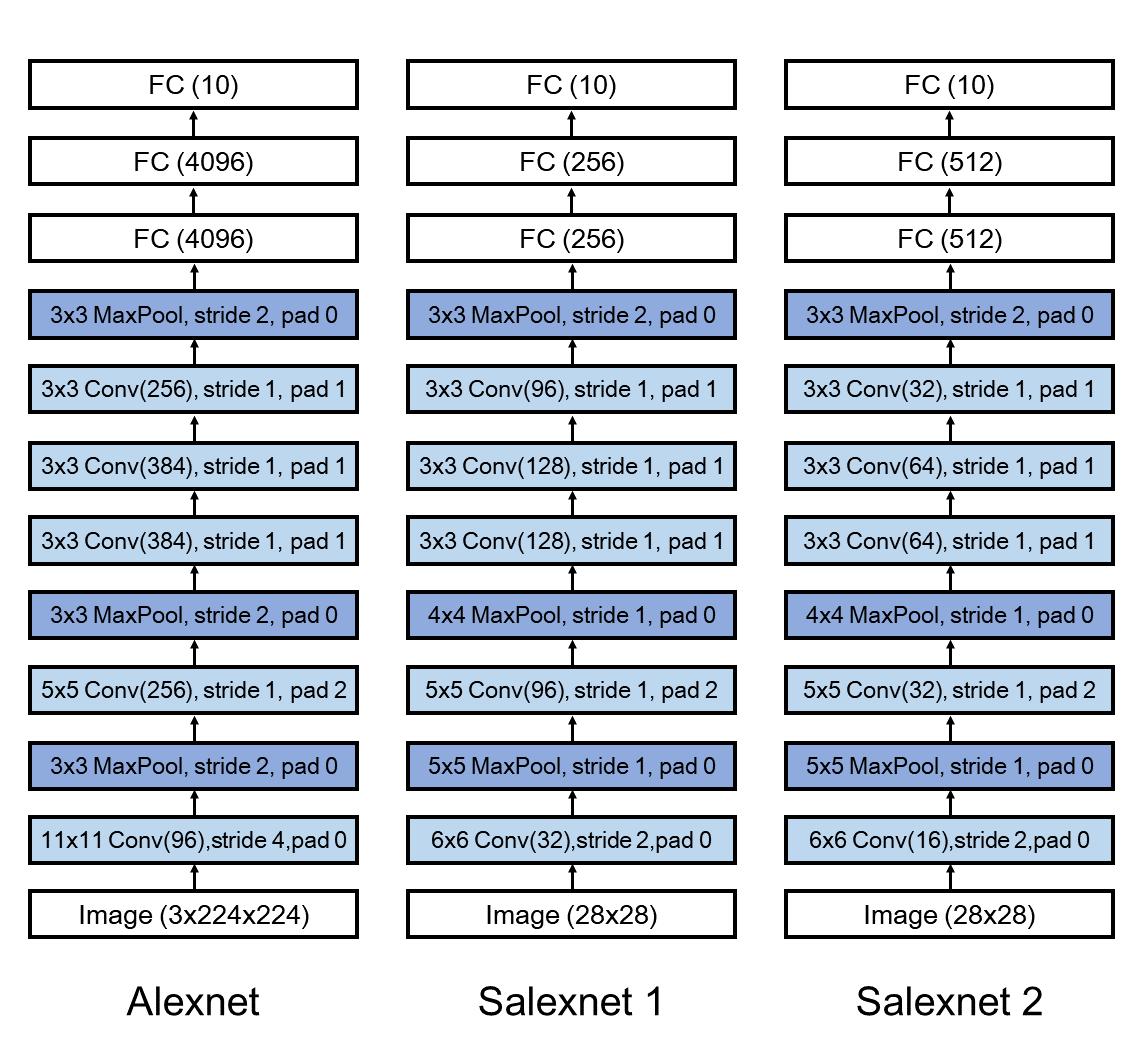

In [13]:
cv2_imshow(cv2.hconcat([im, im2, im3]))

# Summary

저희는 `Lenet`을 구현하여 약 6만개의 가중치를 사용하여 약 85%의 정확도를 달성하였습니다.
이를 `Alexnet`과 비교하였을 때 정확도는 낮지만 약 0.1%의 가중치만을 사용하였다는 것을 감안하면 충분히 의미있는 결과라고 생각됩니다.

저희는 `Alexnet`을 단순화한 모형을 두 가지 제안하였습니다.
그 결과 0.6%의 가중치만을 사용하여 약 87%의 정확도를 달성하였습니다.
이는 원본의 약 91%의 정확도와 비교하여 정확도를 희생한 것에 비하여 가중치를 획기적으로 줄인 것이라 생각됩니다.